In [1]:
# Run once
%load_ext autoreload
%autoreload 2
%cd ../

C:\Users\Marcel\github\deep-optimal-control


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [44]:
import src.data.generate_data as gen
from torch.utils.data import DataLoader
import src.odenet.midpoint_method as mpm
import src.odenet.odenet as odenet

In [49]:
# Generate data
train_data = gen.generate_squares(1000)
train = DataLoader(gen.to_dataset(train_data), batch_size=32, shuffle=True)
#test = DataLoader(gen.to_dataset(gen.generate_squares(100)), batch_size=100, shuffle=False)

In [57]:
# Create network
#net = mpm.MidPointNetwork(5, 2)
net = odenet.EulerNet(2, 8)
print(list(net.parameters()))

[Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True), Parameter containing:
tensor([[-0.1440,  0.5241],
        [-0.2533,  0.6541]], requires_grad=True), Parameter containing:
tensor([0.5898, 0.6082], requires_grad=True), Parameter containing:
tensor([[ 0.0949, -0.0800],
        [ 0.1516, -0.2445]], requires_grad=True), Parameter containing:
tensor([-0.4847, -0.2405], requires_grad=True), Parameter containing:
tensor([[ 0.6371,  0.0402],
        [-0.6018,  0.2829]], requires_grad=True), Parameter containing:
tensor([0.1849, 0.4804], requires_grad=True), Parameter containing:
tensor([[ 0.1275,  0.3344],
        [-0.3019, -0.3472]], requires_grad=True), Parameter containing:
tensor([ 0.5486, -0.6592], requires_grad=True), Parameter containing:
tensor([[ 0.6711,  0.3743],
        [-0.2199, -0.5506]], requires_grad=True), Parameter containing:
tensor([-0.6818,  0.2176], requires_grad=True), Parameter containing:
tensor([[-0.4349, -0.2897],
        [ 0.0939,  

Using device 'cuda:0' for training


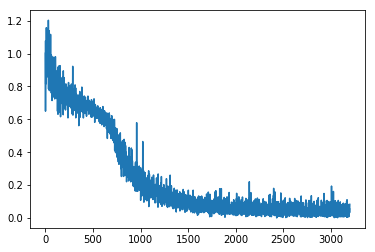

In [58]:
# Train network
results = net.train_network(train, epochs=100)
plt.plot(results)

tensor([[1.0000e+00, 3.5387e-11],
        [1.0000e+00, 2.7724e-11],
        [1.0000e+00, 2.1721e-11],
        ...,
        [1.0000e+00, 1.3487e-12],
        [1.0000e+00, 1.3463e-12],
        [1.0000e+00, 1.3439e-12]])


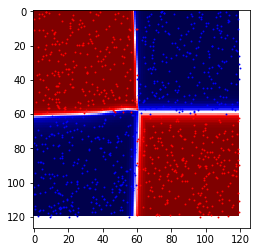

In [59]:
# Make predictions on test data
grid_n = 120
gridpoints = torch.stack(tuple(map(torch.flatten, torch.meshgrid(torch.linspace(-1, 1, grid_n), torch.linspace(-1, 1, grid_n))))).transpose(0, 1)
probs = torch.exp(net.predict(gridpoints))
print(probs)
plt.imshow(probs[:, 0].reshape(grid_n, grid_n).cpu().numpy(), cmap=plt.get_cmap('seismic'))

blue, red = train_data[0][train_data[1]].cpu(), train_data[0][~train_data[1]].cpu()

plt.scatter((blue[:, 0] + 1) * grid_n / 2, (blue[:, 1] + 1) * grid_n / 2, color='blue', s=0.8)
plt.scatter((red[:, 0] + 1) * grid_n / 2, (red[:, 1] + 1) * grid_n / 2, color='red', s=0.8)
plt.show()

In [1]:
list(net.parameters())

NameError: name 'net' is not defined